<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/tokyo_covid19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pytz import timezone
import numpy as np

%matplotlib inline

### Tokyo COVID19 Data
https://github.com/tokyo-metropolitan-gov/covid19

In [2]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
# json文字列をdictへ
j_res = json.loads(response.text)
j_res.keys()

dict_keys(['contacts', 'querents', 'patients', 'patients_summary', 'discharges_summary', 'inspections_summary', 'inspection_persons', 'inspection_status_summary', 'lastUpdate', 'main_summary'])

In [5]:
# データフレームにセット
df = pd.DataFrame(j_res)

In [6]:
# `patients_summary`
df.patients_summary.data[-10:]

[{'小計': 260, '日付': '2020-07-24T08:00:00.000Z'},
 {'小計': 295, '日付': '2020-07-25T08:00:00.000Z'},
 {'小計': 239, '日付': '2020-07-26T08:00:00.000Z'},
 {'小計': 131, '日付': '2020-07-27T08:00:00.000Z'},
 {'小計': 266, '日付': '2020-07-28T08:00:00.000Z'},
 {'小計': 250, '日付': '2020-07-29T08:00:00.000Z'},
 {'小計': 367, '日付': '2020-07-30T08:00:00.000Z'},
 {'小計': 463, '日付': '2020-07-31T08:00:00.000Z'},
 {'小計': 472, '日付': '2020-08-01T08:00:00.000Z'},
 {'小計': 292, '日付': '2020-08-02T08:00:00.000Z'}]

In [7]:
# `patients_summary` の `data` を抽出しデータフレームにセット
sub_df = pd.DataFrame(df.patients_summary.data)
sub_df.tail()

日付   小計
187  2020-07-29T08:00:00.000Z  250
188  2020-07-30T08:00:00.000Z  367
189  2020-07-31T08:00:00.000Z  463
190  2020-08-01T08:00:00.000Z  472
191  2020-08-02T08:00:00.000Z  292

In [8]:
# 日付型の列を追加
#sub_df['datetime.date'] = [datetime.datetime.fromisoformat(str.replace('Z', '+00:00')).astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
# for ~Python3.6(Google Colab)
sub_df['datetime.date'] = [datetime.datetime.strptime(str.split('.')[0].replace('-', '').replace(':', ''), '%Y%m%dT%H%M%S').astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
sub_df.tail()

日付   小計             datetime.date
187  2020-07-29T08:00:00.000Z  250 2020-07-29 17:00:00+09:00
188  2020-07-30T08:00:00.000Z  367 2020-07-30 17:00:00+09:00
189  2020-07-31T08:00:00.000Z  463 2020-07-31 17:00:00+09:00
190  2020-08-01T08:00:00.000Z  472 2020-08-01 17:00:00+09:00
191  2020-08-02T08:00:00.000Z  292 2020-08-02 17:00:00+09:00

In [9]:
# 日付が年の何週目かを列にセット `'{yy}w{week nnum}`
sub_df['week_num'] = [f'\'{d.strftime("%y")}w{d.strftime("%V")}' for d in sub_df['datetime.date']]
sub_df.tail()

日付   小計             datetime.date week_num
187  2020-07-29T08:00:00.000Z  250 2020-07-29 17:00:00+09:00   '20w31
188  2020-07-30T08:00:00.000Z  367 2020-07-30 17:00:00+09:00   '20w31
189  2020-07-31T08:00:00.000Z  463 2020-07-31 17:00:00+09:00   '20w31
190  2020-08-01T08:00:00.000Z  472 2020-08-01 17:00:00+09:00   '20w31
191  2020-08-02T08:00:00.000Z  292 2020-08-02 17:00:00+09:00   '20w31

In [10]:
# 曜日の列をセット
sub_df['week_day'] = [d.strftime('%a') for d in sub_df['datetime.date']]
sub_df.tail(15)

日付   小計             datetime.date week_num week_day
177  2020-07-19T08:00:00.000Z  188 2020-07-19 17:00:00+09:00   '20w29      Sun
178  2020-07-20T08:00:00.000Z  168 2020-07-20 17:00:00+09:00   '20w30      Mon
179  2020-07-21T08:00:00.000Z  237 2020-07-21 17:00:00+09:00   '20w30      Tue
180  2020-07-22T08:00:00.000Z  238 2020-07-22 17:00:00+09:00   '20w30      Wed
181  2020-07-23T08:00:00.000Z  366 2020-07-23 17:00:00+09:00   '20w30      Thu
182  2020-07-24T08:00:00.000Z  260 2020-07-24 17:00:00+09:00   '20w30      Fri
183  2020-07-25T08:00:00.000Z  295 2020-07-25 17:00:00+09:00   '20w30      Sat
184  2020-07-26T08:00:00.000Z  239 2020-07-26 17:00:00+09:00   '20w30      Sun
185  2020-07-27T08:00:00.000Z  131 2020-07-27 17:00:00+09:00   '20w31      Mon
186  2020-07-28T08:00:00.000Z  266 2020-07-28 17:00:00+09:00   '20w31      Tue
187  2020-07-29T08:00:00.000Z  250 2020-07-29 17:00:00+09:00   '20w31      Wed
188  2020-07-30T08:00:00.000Z  367 2020-07-30 17:00:00+09:00   '20w31      Thu
189  2020-07-31T08:00:00.000Z  463 2020-07-31 17:00:00+09:00   '20w31      Fri
190  2020-08-01T08:00:00.000Z  472 2020-08-01 17:00:00+09:00   '20w31      Sat
191  2020-08-02T08:00:00.000Z  292 2020-08-02 17:00:00+09:00   '20w31      Sun

In [11]:
# 週毎に集計
groupby_week_num = sub_df.groupby('week_num')
groupby_week_num

In [12]:
# 集計結果から平均と合計を取得しデータフレームにセット
week_num_df = pd.DataFrame({
    'week_num': sub_df['week_num'].unique(),
    'mean': [m for m in groupby_week_num.agg({'小計': 'mean'})['小計']], 
    'sum': [s for s in groupby_week_num.agg({'小計': 'sum'})['小計']]
})
week_num_df.tail()

week_num        mean   sum
23   '20w27   93.142857   652
24   '20w28  166.000000  1162
25   '20w29  212.000000  1484
26   '20w30  257.571429  1803
27   '20w31  320.142857  2241

### グラフ出力

In [13]:
### 日毎の数
x = sub_df['datetime.date']
y = sub_df['小計']

In [14]:
### 週毎の数
x2 = week_num_df['week_num']
y2_1 = week_num_df['mean']
y2_2 = week_num_df['sum']

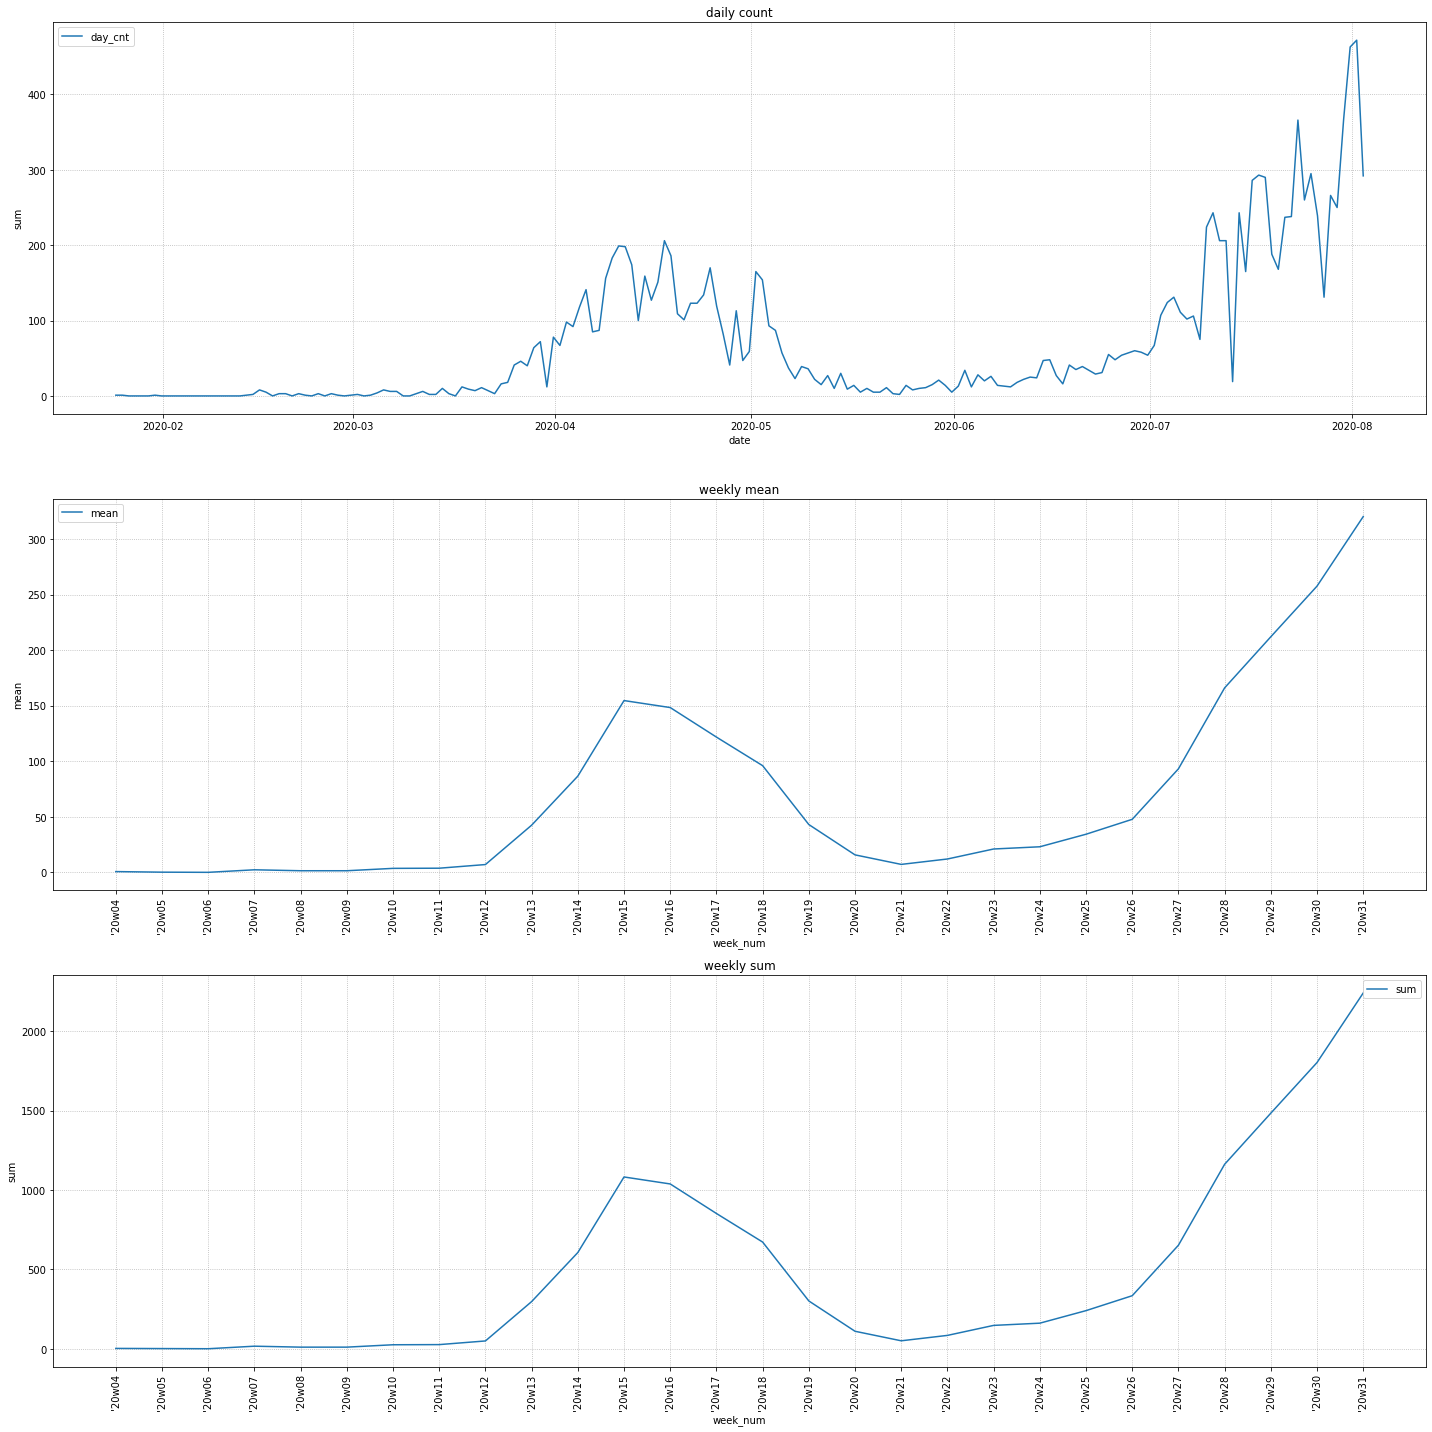

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

### 日毎の数
ax[0].set_title('daily count')
ax[0].set_xlabel('date')
ax[0].set_ylabel('sum')
ax[0].plot(x, y, label='day_cnt')
ax[0].grid(linestyle=':')
ax[0].legend()

### 週毎の平均
ax[1].set_title('weekly mean')
ax[1].set_xticklabels(labels=x2, rotation=90)
ax[1].set_xlabel('week_num')
ax[1].set_ylabel('mean')
ax[1].plot(x2, y2_1, label='mean')
ax[1].grid(linestyle=':')
ax[1].legend()

### 週毎の合計
ax[2].set_title('weekly sum')
ax[2].set_xticklabels(labels=x2, rotation=90)
ax[2].set_xlabel('week_num')
ax[2].set_ylabel('sum')
ax[2].plot(x2, y2_2, label='sum')
ax[2].grid(linestyle=':')
ax[2].legend()

plt.tight_layout()

---

In [16]:
em_start = datetime.datetime(2020, 4, 7)
em_end = datetime.datetime(2020, 5, 25)
em_days = []
for i in range((em_end - em_start).days + 1):
  em_days.append(em_start + datetime.timedelta(i))

In [17]:
year = []
month = []
day = []
for d in sub_df['datetime.date']:
  year.append(int(d.strftime('%Y')))
  month.append(int(d.strftime('%m')))
  day.append(int(d.strftime('%d')))

In [18]:
ds_df = sub_df

# 年
ds_df['year'] = year
# 月
ds_df['month'] = month
# 日
ds_df['day'] = day
# 曜日をダミー変数化
ds_df = pd.concat([ds_df, pd.get_dummies(ds_df['week_day'])], axis=1)
# 経過日数
ds_df['passed'] = [(d - ds_df['datetime.date'][0]).days for d in ds_df['datetime.date']]
# 緊急事態宣言
ds_df['emergency'] = [int(datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') in em_days) for d in ds_df['datetime.date']]
# 緊急事態宣言経過日数
ds_df['em_passed'] = [((datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') - em_start).days if em_start < datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') else 0) for d in ds_df['datetime.date']]
# 検査数

ds_df

日付   小計  ... emergency em_passed
0    2020-01-24T08:00:00.000Z    1  ...         0         0
1    2020-01-25T08:00:00.000Z    1  ...         0         0
2    2020-01-26T08:00:00.000Z    0  ...         0         0
3    2020-01-27T08:00:00.000Z    0  ...         0         0
4    2020-01-28T08:00:00.000Z    0  ...         0         0
..                        ...  ...  ...       ...       ...
187  2020-07-29T08:00:00.000Z  250  ...         0       113
188  2020-07-30T08:00:00.000Z  367  ...         0       114
189  2020-07-31T08:00:00.000Z  463  ...         0       115
190  2020-08-01T08:00:00.000Z  472  ...         0       116
191  2020-08-02T08:00:00.000Z  292  ...         0       117

[192 rows x 18 columns]

In [19]:
ds_df = ds_df.drop(columns=['日付', '小計', 'datetime.date', 'week_num', 'week_day'])
ds_df = pd.concat([ds_df, sub_df['小計']], axis=1)
ds_df

year  month  day  Fri  Mon  ...  Wed  passed  emergency  em_passed   小計
0    2020      1   24    1    0  ...    0       0          0          0    1
1    2020      1   25    0    0  ...    0       1          0          0    1
2    2020      1   26    0    0  ...    0       2          0          0    0
3    2020      1   27    0    1  ...    0       3          0          0    0
4    2020      1   28    0    0  ...    0       4          0          0    0
..    ...    ...  ...  ...  ...  ...  ...     ...        ...        ...  ...
187  2020      7   29    0    0  ...    1     187          0        113  250
188  2020      7   30    0    0  ...    0     188          0        114  367
189  2020      7   31    1    0  ...    0     189          0        115  463
190  2020      8    1    0    0  ...    0     190          0        116  472
191  2020      8    2    0    0  ...    0     191          0        117  292

[192 rows x 14 columns]

In [20]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       192 non-null    int64
 1   month      192 non-null    int64
 2   day        192 non-null    int64
 3   Fri        192 non-null    uint8
 4   Mon        192 non-null    uint8
 5   Sat        192 non-null    uint8
 6   Sun        192 non-null    uint8
 7   Thu        192 non-null    uint8
 8   Tue        192 non-null    uint8
 9   Wed        192 non-null    uint8
 10  passed     192 non-null    int64
 11  emergency  192 non-null    int64
 12  em_passed  192 non-null    int64
 13  小計         192 non-null    int64
dtypes: int64(7), uint8(7)
memory usage: 11.9 KB


In [21]:
ds_df.describe()

year       month         day  ...   emergency   em_passed          小計
count   192.0  192.000000  192.000000  ...  192.000000  192.000000  192.000000
mean   2020.0    4.411458   16.020833  ...    0.255208   35.953125   70.078125
std       0.0    1.842623    9.017121  ...    0.437118   39.136663   93.752203
min    2020.0    1.000000    1.000000  ...    0.000000    0.000000    0.000000
25%    2020.0    3.000000    8.000000  ...    0.000000    0.000000    3.750000
50%    2020.0    4.000000   16.000000  ...    0.000000   21.500000   26.500000
75%    2020.0    6.000000   24.000000  ...    1.000000   69.250000  107.500000
max    2020.0    8.000000   31.000000  ...    1.000000  117.000000  472.000000

[8 rows x 14 columns]

In [22]:
ds_df.corr()

year     month       day  ...  emergency  em_passed        小計
year        NaN       NaN       NaN  ...        NaN        NaN       NaN
month       NaN  1.000000 -0.115219  ...   0.031452   0.927174  0.584837
day         NaN -0.115219  1.000000  ...  -0.021281   0.066512  0.018590
Fri         NaN -0.012212  0.030219  ...  -0.004936  -0.001394  0.082666
Mon         NaN -0.009044 -0.010932  ...   0.003759  -0.013332 -0.133484
Sat         NaN  0.003848 -0.025570  ...  -0.004936   0.005033  0.081561
Sun         NaN  0.011877 -0.027211  ...  -0.004936   0.011460 -0.006500
Thu         NaN  0.007261  0.022385  ...   0.003759   0.005859  0.058785
Tue         NaN -0.009044  0.034046  ...   0.003759  -0.007191 -0.029819
Wed         NaN  0.007261 -0.022593  ...   0.003759  -0.000666 -0.055615
passed      NaN  0.986972  0.045922  ...   0.026404   0.944464  0.591497
emergency   NaN  0.031452 -0.021281  ...   1.000000  -0.179251  0.075910
em_passed   NaN  0.927174  0.066512  ...  -0.179251   1.000000  0.577000
小計          NaN  0.584837  0.018590  ...   0.075910   0.577000  1.000000

[14 rows x 14 columns]